# Table of Contents <a id='back'></a>

* [1. Introduction](#intro)
* [2. General Information](#data_review)
* [3. Data Preprocessing](#data_preprocessing)
* [4. Exploratory Data Analysis](#data_analyzing)
* [5. Hypothesis Testing](#hypotheses)
* [6. Conclusion](#end)

# Data Analyzing of Chicago's Taxi Companies 

## Introduction

This project consists of three different datasets, which are :

1. Data of taxi company names, with total amount of trips made by each company.
2. Data of drop-off locations, with average amount of trips end in each locations.
3. Data of trip durations from Loop to O'Hare International Airport

The first two datasets will be used for exploratory analysis. The third data will be used for conducting hypothesis testing.

### Goals :

This project aims to analyze passengers' preferences and the impact of external factors on the trip.
In addition, it also aims to examine hypothesis testing on the impact of weather towards trip frequencies, with detail as follow :
- The trip durations average from Loop to O'Hare International Airport change on rainy Saturdays.

### Steps :
1. Generate Information of Datasets
2. Data Preprocessing
3. Exploratory Data Analysis
4. Hypothesis Testing

## General Information

Import Pyhthon libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
import math
import numpy as np
import seaborn as sns

Read the first two datasets.

In [2]:
try:
    df_company = pd.read_csv('project_sql_result_01.csv')
    df_location = pd.read_csv('project_sql_result_04.csv')
except:
    df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
    df_location = pd.read_csv('/datasets/project_sql_result_04.csv')

### Company Name

Checking general information of the first dataset, that consists of :
- company_name: names of taxi companies
- trips_amount: trips amonut of each taxi companies on 15-16 November 2017.

In [3]:
df_company.info()
df_company.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


(64, 2)

In [4]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


### Location Name

Checking general information of second dataset, that consists of :
- dropoff_location_name: drop off location names in Chicago
- average_trips: average amount of trips end in each locations on November 2017

In [6]:
df_location.info()
df_location.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


(94, 2)

In [7]:
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
df_location.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Conclusion

There are no problem found in both datasets, as all of data on the correct data type, and there is no mis-typing on the name of columns.

## Data Preprocessing

On this stage, both datasets will be checked to look for any duplicate or missing values.

### Company Name 

In [9]:
df_company.isna().sum() #checking missing values in company name data

company_name    0
trips_amount    0
dtype: int64

In [10]:
df_company.duplicated().sum() #checking duplicate in company name data

0

### Location Name

In [11]:
df_location.isna().sum() #checking missing values in location name data

dropoff_location_name    0
average_trips            0
dtype: int64

In [12]:
df_location.duplicated().sum() #checking duplicate in location name data

0

### Conclusion

There are no found any duplicate or missing values on both datasets, thus, data are ready to be analyzed.

## Exploratory Data Analysis

Analyzing top ten drop-off locations on November 2017.

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Text(0.5, 1.0, 'Top 10 Drop-off Locations')

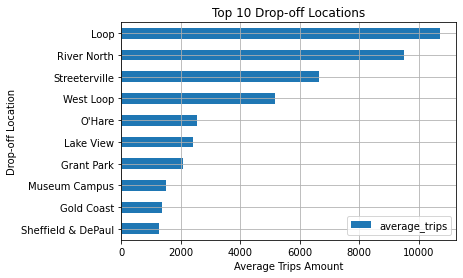

In [13]:
top10_locations = df_location.head(10).sort_values(by = 'average_trips', ascending=False)
print(top10_locations)

top10_locations.sort_values(by = 'average_trips', ascending=True).plot(
    kind='barh', x='dropoff_location_name', y='average_trips', grid = True)
plt.xlabel('Average Trips Amount')
plt.ylabel('Drop-off Location')
plt.title('Top 10 Drop-off Locations')

As it is shown on the graph above, drop-off locations with the highest average trips amount is Loop, that reachs more than 10000 total trips in a month. It is followed by River North, and Streeterville, with average trips amount 9523.67 and 6664.67 for each. Meanwhile, there is Sheffield & DePaul on the tenth position with average trips amount 1259.77, which is approximately ten times less than Loop's average trips amount on the first place. 


Analyzing top ten company with the highest trips total amount.

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


Text(0.5, 1.0, 'Top 10 Companies by Trips Amount')

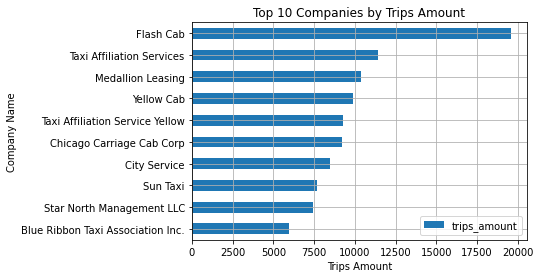

In [14]:
top10_companies = df_company.head(10).sort_values(by = 'trips_amount', ascending=False)
print(top10_companies)

top10_companies.sort_values(by = 'trips_amount', ascending=True).plot(
    kind='barh', x='company_name', y='trips_amount', grid = True)
plt.xlabel('Trips Amount')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Trips Amount')

Flash Cab is taxi company with the highest total trips that reachs 19558 total trips on 15-16 November 2017. This amount is approximately double or more of the other companies' trips amount, in which, there is Blue Ribbon Taxi Association Inc. in the tenth place with 5953 total trips only.

## Hypothesis Testing

The third data, trip durations from Loop to O'Hare International Airport, will be used on this stage, which consists of :

- start_ts : pick-up date and time
- weather_conditions : weather conditions when start the ride
- duration_seconds : trip durations in seconds



### Read & Checking General Information of Data

Before conducting hypothesis testing, data need to be read and checked for the general information contained on it.

Read and check general information of dataset.

In [15]:
try:
    airport_trip = pd.read_csv('project_sql_result_07.csv')
except:
    airport_trip = pd.read_csv('/datasets/project_sql_result_07.csv')

In [16]:
airport_trip.info()
airport_trip.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


(1068, 3)

In [17]:
airport_trip.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [18]:
airport_trip.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [19]:
airport_trip.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [20]:
airport_trip.duplicated().sum()

197

Findings :

There are two major problems found in this data, those are: data type of column `start_ts` is in incorrect data type; and there are also found duplicate values in this dataset. These issues will be fixed on the next step, by fixing data type of column `start_ts`, and remove all duplicate values.

### Fixing Problems

Transform data type of column `start_ts` to be data type of date. 

In [21]:
airport_trip['start_ts']=pd.to_datetime(airport_trip['start_ts'], format='%Y-%m-%d %H:%M:%S')
airport_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Remove all duplicate values found in this dataset.

In [22]:
airport_trip = airport_trip.drop_duplicates()

In [23]:
airport_trip.duplicated().sum()

0

### Conducting Hypothesis Testing

This hypothesis testing aims to examine the presumption that trip durations average from Loop to O'Hare International Airport change on rainy Saturdays, with detail hypothesis as follow :

H0 : There is no difference between trips durations average on rainy Saturdays or not, from Loop to O'Hare International Airport

Ha: There is difference between trips durations average on rainy Saturdays or not, from Loop to O'Hare International Airport



First, let's see the data distribution too remove outlier if there is any.

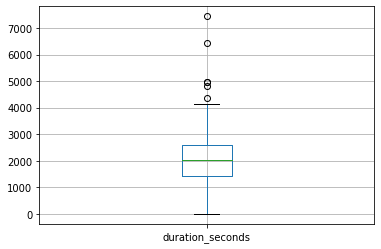

In [24]:
Q1  = airport_trip['duration_seconds'].quantile(0.25)
Q3  = airport_trip['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR

airport_trip.boxplot(['duration_seconds'])
plt.show()

As there are outlier found on the graph above, outlier will be removed.

Remove the outlier :

Lower Whisker : -276.0
Upper Whisker : 4300.0


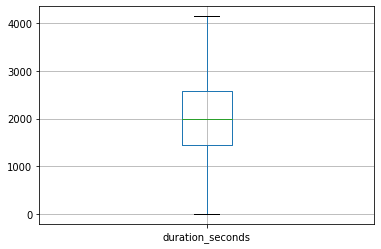

,index,duration_seconds
count,865.000000,865.000000
mean,503.031214,2072.699422
std,310.891233,726.094091
min,0.000000,0.000000
25%,232.000000,1440.000000
50%,483.000000,1997.000000
75%,776.000000,2580.000000
max,1067.000000,4140.000000


In [25]:
airport_trip = airport_trip[(airport_trip['duration_seconds'] < upper_whisker) & (airport_trip['duration_seconds'] > lower_whisker)].reset_index()

print('Lower Whisker :', lower_whisker)
print('Upper Whisker :', upper_whisker)

airport_trip.boxplot(['duration_seconds'])
plt.show()

airport_trip.describe()

Checking data distribution of each weather conditions without outlier.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

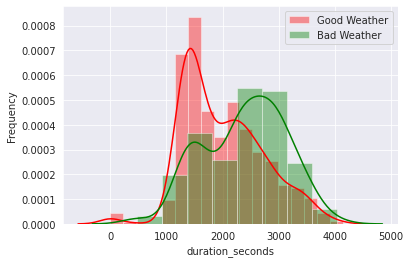

In [26]:
sns.set_style('darkgrid')
sns.distplot(airport_trip[airport_trip['weather_conditions'] == 'Good']['duration_seconds'], color = 'red', label = 'Good Weather')
sns.distplot(airport_trip[airport_trip['weather_conditions'] == 'Bad']['duration_seconds'], color = 'green', label = 'Bad Weather')
plt.legend()
plt.ylabel('Frequency')

<AxesSubplot:xlabel='weather_conditions', ylabel='duration_seconds'>

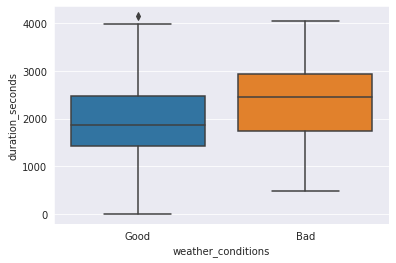

In [27]:
sns.boxplot(x = 'weather_conditions', y = 'duration_seconds', data = airport_trip)

On the graph above, it seems that duration seconds of the trip with good weather condition and bad one have different trip duration average. However, to examine this assumption, hypothesis testing need to be conducted.

Checking the variances of each slice of data grouped by the weather conditions, whether they can be considered to be homogeneous or not. Thus, Levene's test will be implemented.

In [28]:
good_weather = airport_trip['duration_seconds'][airport_trip['weather_conditions'] == 'Good']
bad_weather = airport_trip['duration_seconds'][airport_trip['weather_conditions'] == 'Bad']

alpha = 0.05 
result = st.levene(good_weather, bad_weather, center='mean')

print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('The variances are approximately the same')
else:
    print('The variances are too far apart to be considered homogeneous')

p-value: 0.8508503569618262
The variances are approximately the same


P-value is higher than our significance value, 0.05, it means that both grouped slice of data considered as homogeneous.

Conducting Independent T-Test to examine following hypothesis : 

H0 : There is no difference between trips durations average on rainy Saturdays or not, from Loop to O'Hare International Airport

Ha: There is difference between trips durations average on rainy Saturdays or not, from Loop to O'Hare International Airport

In [29]:
alpha = 0.05

results = st.ttest_ind(good_weather, bad_weather, equal_var = True) 

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We have enough evidence to reject the Null Hypothesis")
else:
    print("We do not have enough evidence to reject the Null Hypothesis")

p-value: 3.6052280777023347e-09
We have enough evidence to reject the Null Hypothesis


P-value is lower than signifance value, 0.05, it means that there is difference between trip durations average on rainy Saturdays and not rainy one, from Loop to O'Hare International Airport.

## Conclusion

This project consists of three different datasets, which are :

1. Data of taxi company names, with total amount of trips made by each company.
2. Data of drop-off locations, with average amount of trips end in each locations.
3. Data of trip durations from Loop to O'Hare International Airport

The first two datasets are used for exploratory analysis. The third data is used for conducting hypothesis testing.

Based on analysis conducted, there are three drop-off locations that have significant average trip amount higher than the other locations in a month, which are Loop, River North, and Streeterville.

Meanwhile, for taxi company with the highest total trips is Flash Cab, that reachs 19558 total trips on 15-16 November 2017. This total amount is significally higher than the other taxi companies, that are approximately two times lower than Flash Cab company total trips.

This project also aims to examine hypothesis on the trip durations average from Loop to O'Hare International Airport change on rainy Saturdays. After conducting Independent T-Test, it is concluded that there is difference between trip durations average on rainy Saturdays and not rainy one, from Loop to O'Hare International Airport.